In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
interest_rates = pd.read_csv ('../../dataset/Indicators/interest_rates.csv', encoding='unicode_escape')

In [3]:
interest_rates.head()

,time,close
0,1971-08-04T01:00:00+01:00,5.50
1,1971-08-16T01:00:00+01:00,5.75
2,1971-09-01T01:00:00+01:00,5.13
3,1971-10-01T01:00:00+01:00,5.13
4,1971-11-01T01:00:00+01:00,5.13


In [4]:
#Cleaning and reindexing
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='linear', inplace=True)
    df.index.names = ['Dates']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df


In [5]:
interest_rates = cleaned_indicator(interest_rates)

In [6]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [10]:
#Interest Rates Visualization
def interest_rates_visualization():
    plt.plot(interest_rates, color= 'b')
    plt.title('US interest rates 1976-2022' , fontsize = 20)
    plt.xlabel('Years', fontsize= 20)
    plt.ylabel('US Interest Rates', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

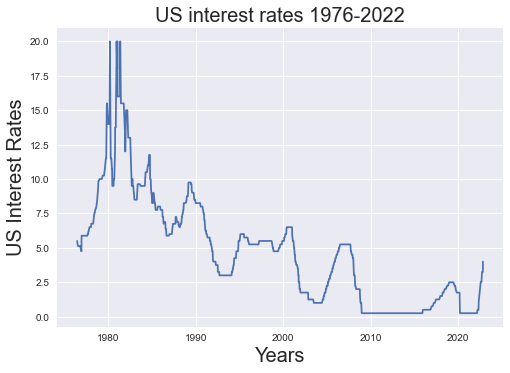

In [11]:
interest_rates_visualization()